In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
df = pd.read_csv (r'C:\Users\pelgu\OneDrive\pma datascience\data.csv')
print (df)

      Gender Home Location Level of Education  Age(Years)  Number of Subjects  \
0       Male         Urban     Under Graduate          18                  11   
1       Male         Urban     Under Graduate          19                   7   
2       Male         Rural     Under Graduate          18                   5   
3       Male         Urban     Under Graduate          18                   5   
4       Male         Rural     Under Graduate          18                   5   
...      ...           ...                ...         ...                 ...   
1028  Female         Rural     Under Graduate          19                   3   
1029  Female         Rural     Under Graduate          20                   6   
1030  Female         Rural     Under Graduate          20                   3   
1031  Female         Rural     Under Graduate          19                   6   
1032  Female         Urban     Under Graduate          20                   6   

     Device type used to at

In [4]:
pd.set_option("display.max_columns", 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

C:\Users\pelgu\AppData\Local\Temp/ipykernel_16508/1690174868.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

In [7]:
df = df.rename(columns={'device_type_used_to_attend_classes': 'device_type', 'internet_facility_in_your_locality': 'internet_facility', 'are_you_involved_in_any_sports?':'does_sports','do_elderly_people_monitor_you?':'elderly_monitor','time_spent_on_social_media_hours':'socialmedia_hours','interested_in_gaming?':'gaming_interest','have_separate_room_for_studying?':'study_room','engaged_in_group_studies?':'group_study','average_marks_scored_before_pandemic_in_traditional_classroom':'prepandemic_grades','your_interaction_in_online_mode':'online_interaction','clearing_doubts_with_faculties_in_online_mode':'online_doubts','interested_in?':'interests','your_level_of_satisfaction_in_online_education':'satisfaction_level'})

In [8]:
df.drop(index=df[df['prepandemic_grades'] == '20-Nov'].index, inplace=True)
df.drop(index=df[df['prepandemic_grades'] == '0-10'].index, inplace=True)

In [9]:
# Converting Atrition 'Yes' to 1 and 'No' to 0
df['gender'] = np.where(df['gender'] == 'Male', 1, 0)
df.astype({"gender": int})
df['home_location'] = np.where(df['home_location'] == 'Urban', 1, 0)
df.astype({"home_location": int})
df['does_sports'] = np.where(df['does_sports'] == 'Yes', 1, 0)
df.astype({"does_sports": int})
df['elderly_monitor'] = np.where(df['elderly_monitor'] == 'Yes', 1, 0)
df.astype({"elderly_monitor": int})
df['gaming_interest'] = np.where(df['gaming_interest'] == 'Yes', 1, 0)
df.astype({"gaming_interest": int})
df['study_room'] = np.where(df['study_room'] == 'Yes', 1, 0)
df.astype({"study_room": int})
df['group_study'] = np.where(df['group_study'] == 'yes', 1, 0)
df.astype({"group_study": int})

,gender,home_location,level_of_education,ageyears,number_of_subjects,device_type,economic_status,family_size,internet_facility,does_sports,elderly_monitor,study_time_hours,sleep_time_hours,socialmedia_hours,gaming_interest,study_room,group_study,prepandemic_grades,online_interaction,online_doubts,interests,performance_in_online,satisfaction_level
0,1,1,Under Graduate,18,11,Laptop,Middle Class,4,5,0,1,3,6,1,0,0,0,91-100,1,1,Practical,6,Average
1,1,1,Under Graduate,19,7,Laptop,Middle Class,4,1,1,1,7,5,1,1,1,0,91-100,1,1,Theory,3,Bad
2,1,0,Under Graduate,18,5,Laptop,Middle Class,5,2,0,1,6,7,1,0,1,0,71-80,1,1,Both,6,Bad
3,1,1,Under Graduate,18,5,Laptop,Middle Class,4,4,1,1,3,6,2,0,0,1,91-100,1,2,Theory,4,Bad
4,1,0,Under Graduate,18,5,Laptop,Middle Class,4,3,0,0,8,7,2,1,1,1,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,Under Graduate,19,3,Mobile,Middle Class,6,5,1,1,4,8,4,1,1,1,91-100,4,4,Theory,8,Average
1029,0,0,Under Graduate,20,6,Desktop,Middle Class,3,1,0,0,3,7,2,1,1,0,71-80,5,5,Theory,10,Average
1030,0,0,Under Graduate,20,3,Mobile,Middle Class,3,2,0,0,3,6,3,0,1,1,71-80,2,2,Theory,6,Average
1031,0,0,Under Graduate,19,6,Mobile,Middle Class,2,3,1,0,4,6,2,1,0,0,61-70,3,3,Both,6,Good


In [10]:
df['prepandemic_grades'] = df['prepandemic_grades'].replace(['91-100', '81-90', '71-80', '61-70', '51-60', '41-50', '31-40', '21-30', '11-20', '1-10'], [10,9, 8, 7,6,5,4,3,2,1])

In [11]:
df['satisfaction_level'] = df['satisfaction_level'].replace(['Bad', 'Average', 'Good'], [1, 2, 3])

<AxesSubplot:>

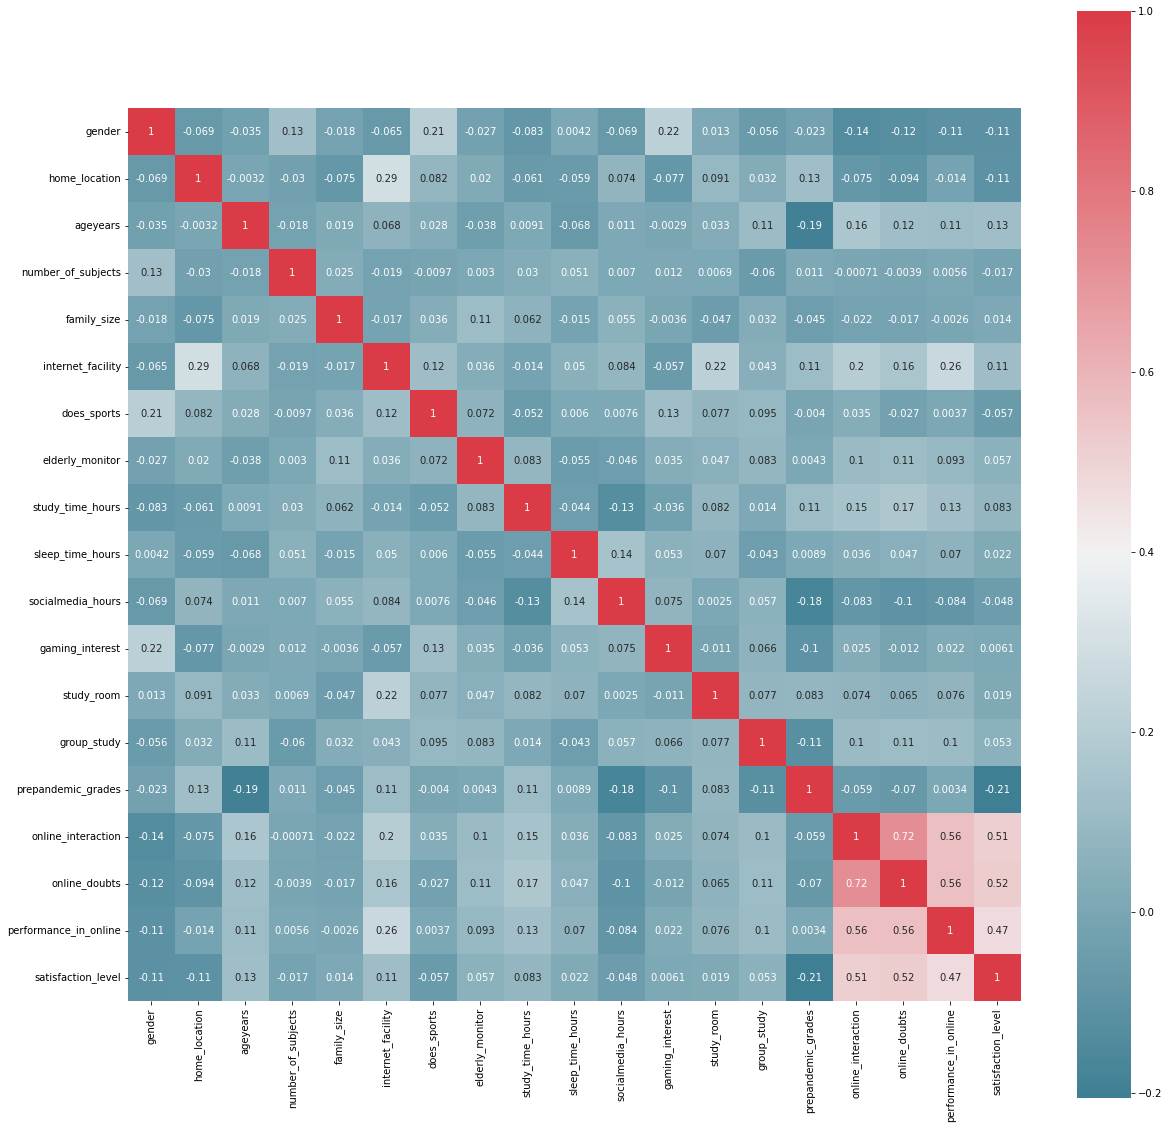

In [12]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

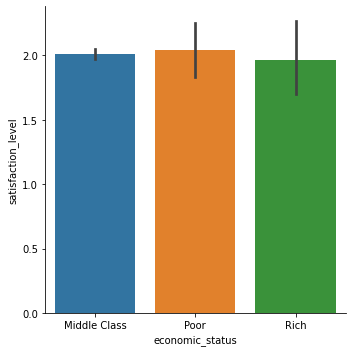

In [13]:
# Plot Marital Status vs Attrition chart
sns.catplot(x = 'economic_status', y='satisfaction_level', kind = 'bar', data=df)

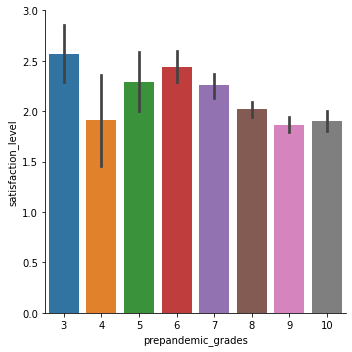

In [14]:
# Plot Marital Status vs Attrition chart
sns.catplot(x = 'prepandemic_grades', y='satisfaction_level', kind = 'bar', data=df)

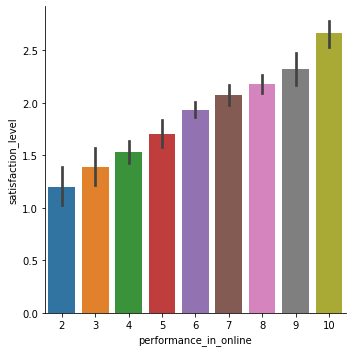

In [15]:
# Plot Marital Status vs Attrition chart
sns.catplot(x = 'performance_in_online', y='satisfaction_level', kind = 'bar', data=df)

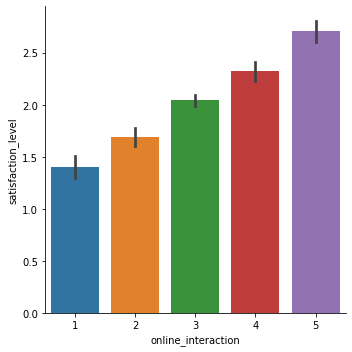

In [16]:
# Plot Marital Status vs Attrition chart
sns.catplot(x = 'online_interaction', y='satisfaction_level', kind = 'bar', data=df)

<AxesSubplot:xlabel='device_type', ylabel='Count'>

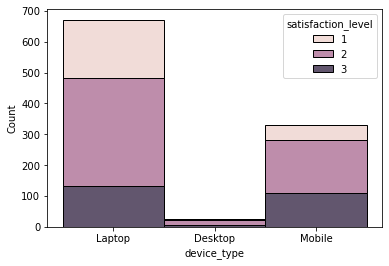

In [17]:
sns.histplot(binwidth=0.5, x="device_type", hue="satisfaction_level", data=df, stat="count", multiple="stack")


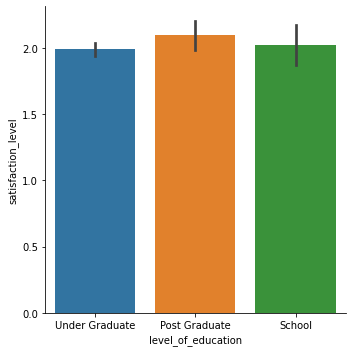

In [18]:
# Plot Marital Status vs Attrition chart
sns.catplot(x = 'level_of_education', y='satisfaction_level', kind = 'bar', data=df)

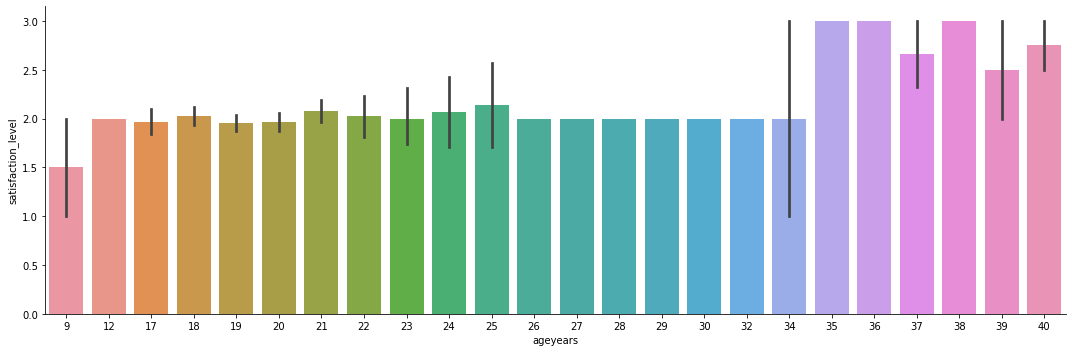

In [19]:
# Plot Age vs Attrition chart
sns.catplot(x = 'ageyears', y='satisfaction_level', kind = 'bar', data=df, aspect = 3)

<AxesSubplot:xlabel='satisfaction_level', ylabel='count'>

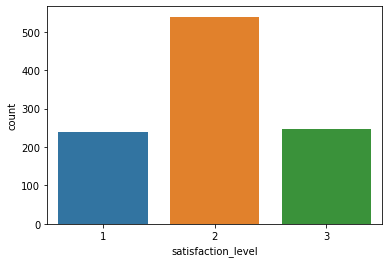

In [20]:
# Plot attrition frequency
sns.countplot(x='satisfaction_level', data=df)

for column in df:
        sns_plot = sns.displot(df[column])



In [21]:
# Get Dummy Variables for different Departments
df = pd.get_dummies(df, columns=["level_of_education"], prefix=["education"])
df = pd.get_dummies(df, columns=["device_type"], prefix=["device"])
df = pd.get_dummies(df, columns=["economic_status"], prefix=["status"])
df = pd.get_dummies(df, columns=["interests"], prefix=["interests"])

In [22]:
# Separate target values
y = df['satisfaction_level']
# Separate variables and remove ID column
X = df.drop(['satisfaction_level'],axis=1)


In [23]:
df = df.astype(int)

profile = ProfileReport(df, title="Pandas Profiling IMA")

profile.to_file("eda_PMA.html")

profile.to_file("eda_PMA.json")

https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [24]:
#Split train and test date
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [25]:
#Print split datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(820, 30)
(206, 30)
(820,)
(206,)


In [26]:
#Import scaler to normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
#Convert scaled data back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns = list(X))
X_test_scaled = pd.DataFrame(X_test_scaled,columns = list(X))

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

elastic_model = ElasticNet(alpha = 0.5, l1_ratio=0.5)

elastic_model_fit = elastic_model.fit(X_train_scaled, y_train)

boston_predict = elastic_model_fit.predict(X_train_scaled)

rmse = (np.sqrt(mean_squared_error(y_train, boston_predict)))
r2 = r2_score(y_train, boston_predict)

print("Training performance (ElasticNet regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

boston_predict_test = elastic_model_fit.predict(X_test_scaled)

rmse = (np.sqrt(mean_squared_error(y_test, boston_predict_test)))
r2 = r2_score(y_test, boston_predict_test)

print("Testing performance (ElasticNet regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

betas = elastic_model_fit.coef_

counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (ElasticNet regularisation)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1
print("\n")

Training performance (ElasticNet regularisation)
--------------------------------------
RMSE is 0.6366732364128057
R2 score is 0.16216826946180385


Testing performance (ElasticNet regularisation)
--------------------------------------
RMSE is 0.6097999652944661
R2 score is 0.1472070299796241


Beta weights/co-efficients (ElasticNet regularisation)
-----------------------------------------
gender: -0.0
home_location: -0.0
ageyears: 0.0
number_of_subjects: -0.0
family_size: -0.0
internet_facility: 0.0
does_sports: -0.0
elderly_monitor: 0.0
study_time_hours: 0.0
sleep_time_hours: 0.0
socialmedia_hours: -0.0
gaming_interest: -0.0
study_room: 0.0
group_study: 0.0
prepandemic_grades: -0.0
online_interaction: 0.0539
online_doubts: 0.0486
performance_in_online: 0.0239
satisfaction_level: 0.0
education_Post Graduate: -0.0
education_School: -0.0
education_Under Graduate: 0.0
device_Desktop: -0.0
device_Laptop: 0.0
device_Mobile: -0.0
status_Middle Class: 0.0
status_Poor: -0.0
status_Rich: -0.0


IndexError: index 30 is out of bounds for axis 0 with size 30

In [30]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.5)

ridge_model_fit = ridge_model.fit(X_train_scaled, y_train)

boston_predict2 = ridge_model_fit.predict(X_train_scaled)

rmse = (np.sqrt(mean_squared_error(y_train, boston_predict2)))
r2 = r2_score(y_train, boston_predict2)

print("Training performance (L2 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

boston_predict_test2 = ridge_model_fit.predict(X_test_scaled)

rmse = (np.sqrt(mean_squared_error(y_test, boston_predict_test2)))
r2 = r2_score(y_test, boston_predict_test2)

print("Testing performance (L2 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

betas = ridge_model_fit.coef_

counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (L2 regularisation)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1
print("\n")

Training performance (L2 regularisation)
--------------------------------------
RMSE is 0.5379722666785183
R2 score is 0.40180415599490993


Testing performance (L2 regularisation)
--------------------------------------
RMSE is 0.537085499826187
R2 score is 0.33846065948623205


Beta weights/co-efficients (L2 regularisation)
-----------------------------------------
gender: -0.0165
home_location: -0.0053
ageyears: 0.0296
number_of_subjects: 0.0131
family_size: -0.0036
internet_facility: 0.0141
does_sports: -0.0209
elderly_monitor: -0.008
study_time_hours: 0.0012
sleep_time_hours: -0.0064
socialmedia_hours: -0.0174
gaming_interest: 0.0015
study_room: 0.0038
group_study: -0.0341
prepandemic_grades: -0.1096
online_interaction: 0.1533
online_doubts: 0.1368
performance_in_online: 0.1633
satisfaction_level: -0.0186
education_Post Graduate: 0.0219
education_School: -0.0002
education_Under Graduate: 0.012
device_Desktop: -0.0262
device_Laptop: 0.0225
device_Mobile: 0.004
status_Middle Class: 0

IndexError: index 30 is out of bounds for axis 0 with size 30

In [25]:
from sklearn.linear_model import Lasso
# fit a L1 model - alpha is a value between 0 and inf where higher
# means more regularisation. Typically we use max = 1
lasso_model = Lasso(alpha = 1)

# fit the model to the training data
lasso_model_fit = lasso_model.fit(X_train_scaled, y_train)

# predict the training data
boston_predict_lasso = lasso_model_fit.predict(X_train_scaled)

# calculate RMSE (root mean square error) and R^2 (predictive power)
# training set
rmse = (np.sqrt(mean_squared_error(y_train, boston_predict_lasso)))
r2 = r2_score(y_train, boston_predict_lasso)

# print the performance metrics
print("Training performance (L1 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# predict the testing data
boston_predict_lasso_test = lasso_model_fit.predict(X_test_scaled)

# calculate RMSE (root mean square error) and R^2 (predictive power)
# testing set
rmse = (np.sqrt(mean_squared_error(y_test, boston_predict_lasso_test)))
r2 = r2_score(y_test, boston_predict_lasso_test)

# print the performance metrics
print("Testing performance (L1 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# print the coefficients
betas = lasso_model_fit.coef_
counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (L1 regularisation)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1

Training performance (L1 regularisation)
--------------------------------------
RMSE is 0.6955657547743083
R2 score is 0.0


Testing performance (L1 regularisation)
--------------------------------------
RMSE is 0.6620373247124063
R2 score is -0.005156698116046021


Beta weights/co-efficients (L1 regularisation)
-----------------------------------------
gender: -0.0
home_location: -0.0
ageyears: 0.0
number_of_subjects: -0.0
family_size: -0.0
internet_facility: 0.0
does_sports: -0.0
elderly_monitor: 0.0
study_time_hours: 0.0
sleep_time_hours: 0.0
socialmedia_hours: -0.0
gaming_interest: -0.0
study_room: 0.0
group_study: 0.0
prepandemic_grades: -0.0
online_interaction: 0.0
online_doubts: 0.0
performance_in_online: 0.0
satisfaction_level: -0.0
education_Post Graduate: -0.0
education_School: 0.0
education_Under Graduate: -0.0
device_Desktop: 0.0
device_Laptop: -0.0
device_Mobile: 0.0
status_Middle Class: -0.0
status_Poor: -0.0
status_Rich: -0.0
interests_Both: 0.0


IndexError: index 29 is out of bounds for axis 0 with size 29

In [26]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear',C=1)

svr_model_fit = svr_model.fit(X_train_scaled, y_train)

boston_predict3 = svr_model_fit.predict(X_train_scaled)

rmse = (np.sqrt(mean_squared_error(y_train, boston_predict3)))
r2 = r2_score(y_train, boston_predict3)

print("Training performance (L2 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

boston_predict_test3 = svr_model_fit.predict(X_test_scaled)

rmse = (np.sqrt(mean_squared_error(y_test, boston_predict_test3)))
r2 = r2_score(y_test, boston_predict_test3)

print("Testing performance (L2 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

betas = svr_model_fit.coef_

counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (L2 regularisation)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1
print("\n")

Training performance (L2 regularisation)
--------------------------------------
RMSE is 0.5494156426462922
R2 score is 0.3760846701391073


Testing performance (L2 regularisation)
--------------------------------------
RMSE is 0.5612171972244956
R2 score is 0.27767813385999984


Beta weights/co-efficients (L2 regularisation)
-----------------------------------------


TypeError: type numpy.ndarray doesn't define __round__ method

In [31]:
df

,ageyears,number_of_subjects,family_size,internet_facility,study_time_hours,sleep_time_hours,socialmedia_hours,prepandemic_grades,online_interaction,online_doubts,performance_in_online,satisfaction_level,gender__Female,gender__Male,home_location__Rural,...,status_Poor,status_Rich,does_sports_No,does_sports_Yes,elderly_monitored_No,elderly_monitored_Yes,gaming_interest_No,gaming_interest_Yes,study_room_No,study_room_Yes,group_study_No,group_study_yes,interests_Both,interests_Practical,interests_Theory
0,18,11,4,5,3,6,1,10,1,1,6,2,0,1,0,...,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0
1,19,7,4,1,7,5,1,10,1,1,3,1,0,1,0,...,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
2,18,5,5,2,6,7,1,8,1,1,6,1,0,1,1,...,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0
3,18,5,4,4,3,6,2,10,1,2,4,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1
4,18,5,4,3,8,7,2,9,3,3,6,2,0,1,1,...,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,19,3,6,5,4,8,4,10,4,4,8,2,1,0,1,...,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
1029,20,6,3,1,3,7,2,8,5,5,10,2,1,0,1,...,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1
1030,20,3,3,2,3,6,3,8,2,2,6,2,1,0,1,...,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
1031,19,6,2,3,4,6,2,7,3,3,6,3,1,0,1,...,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = Ridge()
params = {'alpha':[0.5,0.6,0.7,0.8,0.9,1],'fit_intercept':(True,False)}
grid = GridSearchCV(svc,params)
grid.fit(X_test_scaled, y_test)
print(grid.best_score_)
print(grid.best_estimator_.score)

0.2302108216704614
<bound method RegressorMixin.score of Ridge(alpha=1)>


In [38]:
cvresults= pd.DataFrame(grid.cv_results_)
cvresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003393,0.001005,0.002206,0.000757,0.5,True,"{'alpha': 0.5, 'fit_intercept': True}",0.236631,0.140770,0.137506,0.364738,0.269929,0.229915,0.085217,6
1,0.002792,0.000747,0.001597,0.000489,0.5,False,"{'alpha': 0.5, 'fit_intercept': False}",-323.512861,-8.588615,-9.483151,-9.229502,-10.117627,-72.186351,125.664211,12
2,0.003189,0.000745,0.001995,0.000631,0.6,True,"{'alpha': 0.6, 'fit_intercept': True}",0.236683,0.140930,0.137748,0.364506,0.270012,0.229976,0.085066,5
3,0.003192,0.001163,0.003392,0.001849,0.6,False,"{'alpha': 0.6, 'fit_intercept': False}",-311.969254,-8.590889,-9.484649,-9.227706,-10.114686,-69.877437,121.046895,11
4,0.003390,0.001197,0.003591,0.001353,0.7,True,"{'alpha': 0.7, 'fit_intercept': True}",0.236734,0.141088,0.137989,0.364275,0.270094,0.230036,0.084916,4
5,0.004787,0.002035,0.003192,0.001466,0.7,False,"{'alpha': 0.7, 'fit_intercept': False}",-301.048893,-8.593158,-9.486142,-9.225919,-10.111772,-67.693177,116.678875,10
6,0.002193,0.000746,0.001995,0.001092,0.8,True,"{'alpha': 0.8, 'fit_intercept': True}",0.236785,0.141246,0.138229,0.364043,0.270174,0.230095,0.084767,3
7,0.001995,0.000002,0.001397,0.000489,0.8,False,"{'alpha': 0.8, 'fit_intercept': False}",-290.707670,-8.595421,-9.487632,-9.224138,-10.108884,-65.624749,112.542509,9
8,0.002393,0.000488,0.001596,0.000488,0.9,True,"{'alpha': 0.9, 'fit_intercept': True}",0.236835,0.141402,0.138466,0.363812,0.270251,0.230153,0.084617,2
9,0.001795,0.000399,0.001595,0.000488,0.9,False,"{'alpha': 0.9, 'fit_intercept': False}",-280.905313,-8.597678,-9.489118,-9.222364,-10.106022,-63.664099,108.621687,8


In [40]:
df.corr(method ='pearson')

,ageyears,number_of_subjects,family_size,internet_facility,study_time_hours,sleep_time_hours,socialmedia_hours,prepandemic_grades,online_interaction,online_doubts,performance_in_online,satisfaction_level,gender__Female,gender__Male,home_location__Rural,...,status_Poor,status_Rich,does_sports_No,does_sports_Yes,elderly_monitored_No,elderly_monitored_Yes,gaming_interest_No,gaming_interest_Yes,study_room_No,study_room_Yes,group_study_No,group_study_yes,interests_Both,interests_Practical,interests_Theory
ageyears,1.000000,-0.018407,0.019206,0.068040,0.009059,-0.067695,0.011068,-0.192750,0.163854,0.122492,0.109907,0.126454,0.034759,-0.034759,0.003205,...,-0.047326,0.023414,-0.028113,0.028113,0.037569,-0.037569,0.002852,-0.002852,-0.033317,0.033317,-0.105300,0.105300,0.090857,0.021785,-0.126185
number_of_subjects,-0.018407,1.000000,0.025308,-0.018954,0.029771,0.051395,0.007021,0.010550,-0.000708,-0.003861,0.005644,-0.017408,-0.130298,0.130298,0.029581,...,0.006278,-0.032776,0.009735,-0.009735,-0.002994,0.002994,-0.011908,0.011908,-0.006871,0.006871,0.059633,-0.059633,0.026852,-0.001452,-0.028132
family_size,0.019206,0.025308,1.000000,-0.016523,0.062488,-0.015139,0.055168,-0.045161,-0.021616,-0.017465,-0.002605,0.014073,0.018163,-0.018163,0.075088,...,0.064421,0.049882,-0.035567,0.035567,-0.110653,0.110653,0.003599,-0.003599,0.046895,-0.046895,-0.032359,0.032359,-0.085559,0.083992,-0.002516
internet_facility,0.068040,-0.018954,-0.016523,1.000000,-0.013898,0.049981,0.083749,0.113827,0.202672,0.157419,0.262896,0.114446,0.065444,-0.065444,-0.289611,...,-0.150137,0.177332,-0.116004,0.116004,-0.036147,0.036147,0.056866,-0.056866,-0.221508,0.221508,-0.042513,0.042513,0.095404,-0.086147,-0.005914
study_time_hours,0.009059,0.029771,0.062488,-0.013898,1.000000,-0.044223,-0.127854,0.110686,0.145378,0.170712,0.131312,0.082885,0.083275,-0.083275,0.061245,...,0.023496,-0.038204,0.052150,-0.052150,-0.083058,0.083058,0.036329,-0.036329,-0.081980,0.081980,-0.014092,0.014092,0.028659,-0.031987,0.005316
sleep_time_hours,-0.067695,0.051395,-0.015139,0.049981,-0.044223,1.000000,0.142652,0.008884,0.036467,0.046848,0.070427,0.021834,-0.004162,0.004162,0.059146,...,0.025577,0.015123,-0.006036,0.006036,0.055412,-0.055412,-0.053235,0.053235,-0.069644,0.069644,0.043329,-0.043329,-0.025122,0.018234,0.006726
socialmedia_hours,0.011068,0.007021,0.055168,0.083749,-0.127854,0.142652,1.000000,-0.176533,-0.083168,-0.101189,-0.084408,-0.048437,0.069137,-0.069137,-0.073566,...,-0.063885,0.064475,-0.007628,0.007628,0.045698,-0.045698,-0.074618,0.074618,-0.002508,0.002508,-0.056690,0.056690,-0.019810,0.005697,0.015383
prepandemic_grades,-0.192750,0.010550,-0.045161,0.113827,0.110686,0.008884,-0.176533,1.000000,-0.059298,-0.070405,0.003419,-0.206302,0.023041,-0.023041,-0.127705,...,-0.001329,0.077286,0.003973,-0.003973,-0.004313,0.004313,0.100308,-0.100308,-0.082691,0.082691,0.114598,-0.114598,0.133596,-0.024696,-0.119676
online_interaction,0.163854,-0.000708,-0.021616,0.202672,0.145378,0.036467,-0.083168,-0.059298,1.000000,0.722108,0.557974,0.514485,0.137565,-0.137565,0.074572,...,0.017909,0.037004,-0.035246,0.035246,-0.104525,0.104525,-0.024617,0.024617,-0.074390,0.074390,-0.103150,0.103150,-0.015708,-0.068462,0.096934
online_doubts,0.122492,-0.003861,-0.017465,0.157419,0.170712,0.046848,-0.101189,-0.070405,0.722108,1.000000,0.559356,0.519651,0.121685,-0.121685,0.093630,...,0.026896,0.029167,0.027059,-0.027059,-0.112148,0.112148,0.012137,-0.012137,-0.064953,0.064953,-0.112667,0.112667,-0.007137,-0.068703,0.087697


In [50]:
import seaborn as sn
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<Axes:title={'center':'Correlation Matrix'}>

In [51]:
profile = ProfileReport(df, title="Pandas Profiling IMA")

profile.to_file("eda_PMA.html")

profile.to_file("eda_PMA.json")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

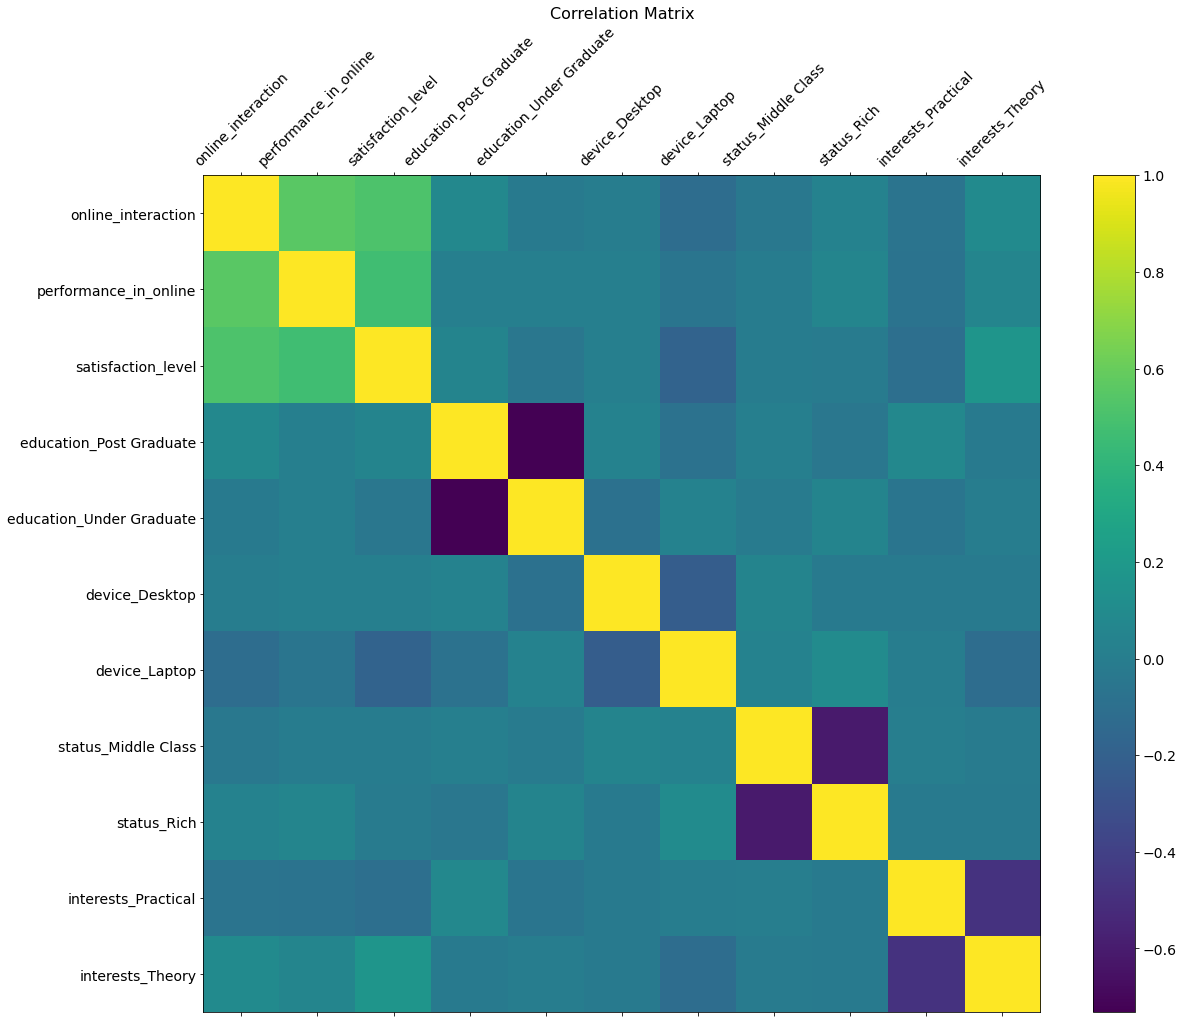

In [24]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [61]:
## getting column names
x_columns = list(X)

In [63]:
## creating function to get model statistics
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:     satisfaction_level   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           2.48e-91
Time:                        16:34:09   Log-Likelihood:                -816.12
No. Observations:                1026   AIC:                             1684.
Df Residuals:                    1000   BIC:                             1813.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
gender                  

In [64]:
x_columns.remove("study_time_hours")
get_stats()

                            OLS Regression Results                            
Dep. Variable:     satisfaction_level   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     27.17
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           4.71e-92
Time:                        16:36:59   Log-Likelihood:                -816.12
No. Observations:                1026   AIC:                             1682.
Df Residuals:                    1001   BIC:                             1806.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
gender                  

In [67]:


x_columns.remove("gender")
x_columns.remove("ageyears")
x_columns.remove("home_location")
x_columns.remove("family_size")
x_columns.remove("internet_facility")
x_columns.remove("does_sports")
x_columns.remove("elderly_monitor")
x_columns.remove("sleep_time_hours")
x_columns.remove("gaming_interest")
x_columns.remove("socialmedia_hours")
x_columns.remove("study_room")
x_columns.remove("group_study")

get_stats()

                            OLS Regression Results                            
Dep. Variable:     satisfaction_level   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     53.58
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.98e-99
Time:                        16:47:14   Log-Likelihood:                -821.35
No. Observations:                1026   AIC:                             1669.
Df Residuals:                    1013   BIC:                             1733.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
prepandemic_grades      

In [68]:
x_columns

['prepandemic_grades',
 'online_interaction',
 'online_doubts',
 'performance_in_online',
 'education_Post Graduate',
 'education_School',
 'education_Under Graduate',
 'device_Desktop',
 'device_Laptop',
 'device_Mobile',
 'status_Middle Class',
 'status_Poor',
 'status_Rich',
 'interests_Both',
 'interests_Practical',
 'interests_Theory']

In [70]:
list(df)

['gender',
 'home_location',
 'ageyears',
 'number_of_subjects',
 'family_size',
 'internet_facility',
 'does_sports',
 'elderly_monitor',
 'study_time_hours',
 'sleep_time_hours',
 'socialmedia_hours',
 'gaming_interest',
 'study_room',
 'group_study',
 'prepandemic_grades',
 'online_interaction',
 'online_doubts',
 'performance_in_online',
 'satisfaction_level',
 'education_Post Graduate',
 'education_School',
 'education_Under Graduate',
 'device_Desktop',
 'device_Laptop',
 'device_Mobile',
 'status_Middle Class',
 'status_Poor',
 'status_Rich',
 'interests_Both',
 'interests_Practical',
 'interests_Theory']

In [10]:
df

,prepandemic_grades,online_interaction,online_doubts,performance_in_online,satisfaction_level,education_Post Graduate,education_School,education_Under Graduate,device_Desktop,device_Laptop,device_Mobile,status_Middle Class,status_Poor,status_Rich,interests_Both,interests_Practical,interests_Theory
0,10,1,1,6,Average,0,0,1,0,1,0,1,0,0,0,1,0
1,10,1,1,3,Bad,0,0,1,0,1,0,1,0,0,0,0,1
2,8,1,1,6,Bad,0,0,1,0,1,0,1,0,0,1,0,0
3,10,1,2,4,Bad,0,0,1,0,1,0,1,0,0,0,0,1
4,9,3,3,6,Average,0,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,10,4,4,8,Average,0,0,1,0,0,1,1,0,0,0,0,1
1029,8,5,5,10,Average,0,0,1,1,0,0,1,0,0,0,0,1
1030,8,2,2,6,Average,0,0,1,0,0,1,1,0,0,0,0,1
1031,7,3,3,6,Good,0,0,1,0,0,1,1,0,0,1,0,0


In [50]:
df_reduced = df.drop(['education_Post Graduate','education_School','education_Under Graduate','device_Desktop','device_Mobile','status_Middle Class','status_Poor','status_Rich','interests_Both','interests_Practical','interests_Theory'],axis=1)

In [21]:
df

,prepandemic_grades,online_interaction,online_doubts,performance_in_online,satisfaction_level,device_Laptop
0,10,1,1,6,2,1
1,10,1,1,3,1,1
2,8,1,1,6,1,1
3,10,1,2,4,1,1
4,9,3,3,6,2,1
...,...,...,...,...,...,...
1028,10,4,4,8,2,0
1029,8,5,5,10,2,0
1030,8,2,2,6,2,0
1031,7,3,3,6,3,0


In [22]:
X

,prepandemic_grades,online_interaction,online_doubts,performance_in_online,device_Laptop
0,10,1,1,6,1
1,10,1,1,3,1
2,8,1,1,6,1
3,10,1,2,4,1
4,9,3,3,6,1
...,...,...,...,...,...
1028,10,4,4,8,0
1029,8,5,5,10,0
1030,8,2,2,6,0
1031,7,3,3,6,0


In [35]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


In [34]:
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train_scaled, y_train)
selector.support_


selector.ranking_

array([1, 1, 1, 1, 1])

In [36]:
# Create the RFE object and compute a cross-validated score.
svc = SVR(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X1 = df[list(df)]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
    for i in range(len(X1.columns))]

print(vif_data)


                     feature       VIF
0         prepandemic_grades  1.151279
1         online_interaction  2.342573
2              online_doubts  2.357017
3      performance_in_online  1.669802
4         satisfaction_level  1.634749
5    education_Post Graduate       inf
6           education_School       inf
7   education_Under Graduate       inf
8             device_Desktop       inf
9              device_Laptop       inf
10             device_Mobile       inf
11       status_Middle Class       inf
12               status_Poor       inf
13               status_Rich       inf
14            interests_Both       inf
15       interests_Practical       inf
16          interests_Theory       inf


C:\Users\pelgu\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [14]:
df

,prepandemic_grades,online_interaction,online_doubts,performance_in_online,satisfaction_level,education_Post Graduate,education_School,education_Under Graduate,device_Desktop,device_Laptop,device_Mobile,status_Middle Class,status_Poor,status_Rich,interests_Both,interests_Practical,interests_Theory
0,10,1,1,6,2,0,0,1,0,1,0,1,0,0,0,1,0
1,10,1,1,3,1,0,0,1,0,1,0,1,0,0,0,0,1
2,8,1,1,6,1,0,0,1,0,1,0,1,0,0,1,0,0
3,10,1,2,4,1,0,0,1,0,1,0,1,0,0,0,0,1
4,9,3,3,6,2,0,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,10,4,4,8,2,0,0,1,0,0,1,1,0,0,0,0,1
1029,8,5,5,10,2,0,0,1,1,0,0,1,0,0,0,0,1
1030,8,2,2,6,2,0,0,1,0,0,1,1,0,0,0,0,1
1031,7,3,3,6,3,0,0,1,0,0,1,1,0,0,1,0,0


In [17]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Text(0.5, 1.0, 'hp')

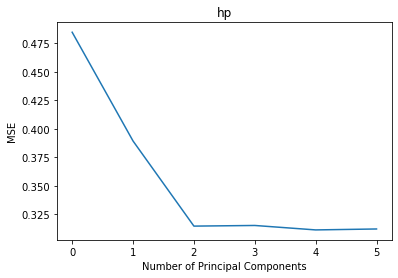

In [49]:
#define predictor and response variables

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train_scaled))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = Ridge()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
svr = SVR()
sfs = SequentialFeatureSelector(svr, n_features_to_select=5)
sfs.fit(X_train_scaled, y_train)

SequentialFeatureSelector(estimator=SVR(), n_features_to_select=5)

In [33]:
sfs.get_support()



array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [41]:
x_sfs= pd.DataFrame(sfs.transform(X_train_scaled).shape)

In [39]:
X_train_scaled.shape

(820, 30)

In [42]:
x_sfs

,0
0,820
1,5


In [43]:
sfs.get_feature_names_out(input_features=None)

AttributeError: 'SequentialFeatureSelector' object has no attribute 'get_feature_names_out'

In [12]:
df_reduced

,prepandemic_grades,online_interaction,online_doubts,performance_in_online,satisfaction_level,education_Post Graduate,education_School,education_Under Graduate,device_Desktop,device_Laptop,device_Mobile,status_Middle Class,status_Poor,status_Rich,interests_Both,interests_Practical,interests_Theory
0,10,1,1,6,2,0,0,1,0,1,0,1,0,0,0,1,0
1,10,1,1,3,1,0,0,1,0,1,0,1,0,0,0,0,1
2,8,1,1,6,1,0,0,1,0,1,0,1,0,0,1,0,0
3,10,1,2,4,1,0,0,1,0,1,0,1,0,0,0,0,1
4,9,3,3,6,2,0,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,10,4,4,8,2,0,0,1,0,0,1,1,0,0,0,0,1
1029,8,5,5,10,2,0,0,1,1,0,0,1,0,0,0,0,1
1030,8,2,2,6,2,0,0,1,0,0,1,1,0,0,0,0,1
1031,7,3,3,6,3,0,0,1,0,0,1,1,0,0,1,0,0


In [17]:
df_reduced = df.drop(['education_Post Graduate','education_School','education_Under Graduate','device_Desktop','device_Mobile','status_Middle Class','status_Poor','status_Rich','interests_Both','interests_Practical','interests_Theory','online_doubts','prepandemic_grades'],axis=1)

In [18]:
df_reduced

,gender,home_location,ageyears,number_of_subjects,family_size,internet_facility,does_sports,elderly_monitor,study_time_hours,sleep_time_hours,socialmedia_hours,gaming_interest,study_room,group_study,online_interaction,performance_in_online,satisfaction_level,device_Laptop
0,1,1,18,11,4,5,0,1,3,6,1,0,0,0,1,6,2,1
1,1,1,19,7,4,1,1,1,7,5,1,1,1,0,1,3,1,1
2,1,0,18,5,5,2,0,1,6,7,1,0,1,0,1,6,1,1
3,1,1,18,5,4,4,1,1,3,6,2,0,0,0,1,4,1,1
4,1,0,18,5,4,3,0,0,8,7,2,1,1,0,3,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,19,3,6,5,1,1,4,8,4,1,1,0,4,8,2,0
1029,0,0,20,6,3,1,0,0,3,7,2,1,1,0,5,10,2,0
1030,0,0,20,3,3,2,0,0,3,6,3,0,1,0,2,6,2,0
1031,0,0,19,6,2,3,1,0,4,6,2,1,0,0,3,6,3,0


In [11]:
df = df.drop(['gender',
 'home_location',
 'ageyears',
 'number_of_subjects',
 'family_size',
 'internet_facility',
 'does_sports',
 'elderly_monitor',
 'study_time_hours',
 'sleep_time_hours',
 'socialmedia_hours',
 'gaming_interest',
 'study_room',
 'group_study','education_School','device_Mobile','status_Poor','interests_Both','online_doubts','prepandemic_grades'],axis=1)

In [21]:
df_reduced

,online_interaction,performance_in_online,satisfaction_level,device_Laptop
0,1,6,2,1
1,1,3,1,1
2,1,6,1,1
3,1,4,1,1
4,3,6,2,1
...,...,...,...,...
1028,4,8,2,0
1029,5,10,2,0
1030,2,6,2,0
1031,3,6,3,0


In [23]:
df_reduced = df_reduced.drop(['device_Laptop'], axis = 1)

In [24]:
df_reduced

,online_interaction,performance_in_online,satisfaction_level
0,1,6,2
1,1,3,1
2,1,6,1
3,1,4,1
4,3,6,2
...,...,...,...
1028,4,8,2
1029,5,10,2
1030,2,6,2
1031,3,6,3


In [25]:
# Separate target values
y = df_reduced['satisfaction_level']
# Separate variables and remove ID column
X = df_reduced.drop(['satisfaction_level'],axis=1)

In [11]:
df

,gender,home_location,ageyears,number_of_subjects,family_size,internet_facility,does_sports,elderly_monitor,study_time_hours,sleep_time_hours,socialmedia_hours,gaming_interest,study_room,group_study,prepandemic_grades,...,online_doubts,performance_in_online,satisfaction_level,education_Post Graduate,education_School,education_Under Graduate,device_Desktop,device_Laptop,device_Mobile,status_Middle Class,status_Poor,status_Rich,interests_Both,interests_Practical,interests_Theory
0,1,1,18,11,4,5,0,1,3,6,1,0,0,0,10,...,1,6,2,0,0,1,0,1,0,1,0,0,0,1,0
1,1,1,19,7,4,1,1,1,7,5,1,1,1,0,10,...,1,3,1,0,0,1,0,1,0,1,0,0,0,0,1
2,1,0,18,5,5,2,0,1,6,7,1,0,1,0,8,...,1,6,1,0,0,1,0,1,0,1,0,0,1,0,0
3,1,1,18,5,4,4,1,1,3,6,2,0,0,0,10,...,2,4,1,0,0,1,0,1,0,1,0,0,0,0,1
4,1,0,18,5,4,3,0,0,8,7,2,1,1,0,9,...,3,6,2,0,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,19,3,6,5,1,1,4,8,4,1,1,0,10,...,4,8,2,0,0,1,0,0,1,1,0,0,0,0,1
1029,0,0,20,6,3,1,0,0,3,7,2,1,1,0,8,...,5,10,2,0,0,1,1,0,0,1,0,0,0,0,1
1030,0,0,20,3,3,2,0,0,3,6,3,0,1,0,8,...,2,6,2,0,0,1,0,0,1,1,0,0,0,0,1
1031,0,0,19,6,2,3,1,0,4,6,2,1,0,0,7,...,3,6,3,0,0,1,0,0,1,1,0,0,1,0,0


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
dtr = DecisionTreeRegressor()

In [28]:
dtr.fit(X_train_scaled, y_train)

score = dtr.score(X_train_scaled, y_train)
print("R-squared:", score) 
 


R-squared: 1.0


In [27]:

# fit a L1 model - alpha is a value between 0 and inf where higher
# means more regularisation. Typically we use max = 1
lasso_model = DecisionTreeRegressor()

# fit the model to the training data
lasso_model_fit = lasso_model.fit(X_train_scaled, y_train)

# predict the training data
boston_predict_lasso = lasso_model_fit.predict(X_train_scaled)

# calculate RMSE (root mean square error) and R^2 (predictive power)
# training set
rmse = (np.sqrt(mean_squared_error(y_train, boston_predict_lasso)))
r2 = r2_score(y_train, boston_predict_lasso)

# print the performance metrics
print("Training performance (L1 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# predict the testing data
boston_predict_lasso_test = lasso_model_fit.predict(X_test_scaled)

# calculate RMSE (root mean square error) and R^2 (predictive power)
# testing set
rmse = (np.sqrt(mean_squared_error(y_test, boston_predict_lasso_test)))
r2 = r2_score(y_test, boston_predict_lasso_test)

# print the performance metrics
print("Testing performance (L1 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# print the coefficients
betas = lasso_model_fit.coef_
counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (L1 regularisation)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1

Training performance (L1 regularisation)
--------------------------------------
RMSE is 0.0
R2 score is 1.0


Testing performance (L1 regularisation)
--------------------------------------
RMSE is 0.7240661880382167
R2 score is -0.20233463035019472




AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [15]:
X_train_scaled = X_train_scaled.drop(['online_doubts'],axis=1)
X_test_scaled = X_test_scaled.drop(['online_doubts'],axis=1)


In [34]:
X_train_scaled

,gender,home_location,ageyears,number_of_subjects,family_size,internet_facility,does_sports,elderly_monitor,study_time_hours,sleep_time_hours,socialmedia_hours,gaming_interest,study_room,group_study,prepandemic_grades,online_interaction,performance_in_online,education_Post Graduate,education_School,education_Under Graduate,device_Desktop,device_Laptop,device_Mobile,status_Middle Class,status_Poor,status_Rich,interests_Both,interests_Practical,interests_Theory
0,0.822734,0.723991,-0.547545,0.374607,-1.122281,0.391313,1.351882,0.929320,-0.188172,-1.461721,-0.357018,-1.105542,0.856513,-0.814424,0.550065,0.051637,0.684379,-0.376910,-0.310253,0.518989,-0.17364,0.735767,-0.689072,0.280976,-0.214286,-0.17364,-0.722036,1.170445,-0.554811
1,0.822734,0.723991,-0.547545,0.374607,-0.330310,0.391313,-0.739709,0.929320,-1.120505,-0.707877,-0.888333,-1.105542,-1.167524,-0.814424,1.301821,-1.750179,-1.405716,-0.376910,-0.310253,0.518989,-0.17364,0.735767,-0.689072,0.280976,-0.214286,-0.17364,1.384973,-0.854376,-0.554811
2,0.822734,0.723991,1.292566,4.354529,-0.330310,0.391313,-0.739709,0.929320,0.744161,-0.707877,-0.888333,0.904534,0.856513,1.227862,-0.201691,0.952545,1.206902,2.653152,-0.310253,-1.926822,-0.17364,0.735767,-0.689072,0.280976,-0.214286,-0.17364,1.384973,-0.854376,-0.554811
3,0.822734,0.723991,-0.240860,-0.349015,-0.330310,0.391313,-0.739709,0.929320,-0.188172,0.799809,0.174297,0.904534,-1.167524,-0.814424,-0.201691,1.853453,0.684379,-0.376910,-0.310253,0.518989,-0.17364,-1.359126,1.451227,0.280976,-0.214286,-0.17364,-0.722036,1.170445,-0.554811
4,0.822734,0.723991,0.679196,-0.349015,2.837573,1.375597,1.351882,0.929320,-0.188172,0.045966,-0.357018,0.904534,-1.167524,1.227862,-0.201691,0.952545,0.684379,-0.376910,-0.310253,0.518989,-0.17364,0.735767,-0.689072,0.280976,-0.214286,-0.17364,-0.722036,-0.854376,1.802416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.822734,0.723991,1.905937,0.736418,1.253632,0.391313,1.351882,0.929320,-1.586672,-1.461721,3.893503,0.904534,-1.167524,1.227862,-0.953447,-0.849271,-1.405716,2.653152,-0.310253,-1.926822,-0.17364,0.735767,-0.689072,0.280976,-0.214286,-0.17364,-0.722036,1.170445,-0.554811
816,-1.215459,0.723991,-0.547545,-0.710827,1.253632,-1.577255,-0.739709,-1.076055,0.744161,0.045966,-0.888333,-1.105542,-1.167524,-0.814424,1.301821,0.051637,-1.928240,-0.376910,-0.310253,0.518989,-0.17364,-1.359126,1.451227,-3.559026,4.666667,-0.17364,1.384973,-0.854376,-0.554811
817,-1.215459,-1.381232,-0.240860,-0.710827,-0.330310,1.375597,-0.739709,0.929320,-1.586672,0.045966,-0.357018,0.904534,0.856513,-0.814424,-0.953447,1.853453,1.729426,-0.376910,-0.310253,0.518989,-0.17364,0.735767,-0.689072,0.280976,-0.214286,-0.17364,-0.722036,1.170445,-0.554811
818,0.822734,-1.381232,-0.240860,-0.349015,-1.122281,-1.577255,-0.739709,-1.076055,0.277994,-1.461721,-0.888333,-1.105542,-1.167524,-0.814424,0.550065,0.051637,0.684379,-0.376910,-0.310253,0.518989,-0.17364,0.735767,-0.689072,0.280976,-0.214286,-0.17364,1.384973,-0.854376,-0.554811
